# Ch 10-3. 일원분산분석(ANOVA)
독립표본 t검정에서 발전한 단계가 일원 분산 분석이다.  
목적: 셋 이상의 그룹 간 차이가 존재하는지 확인하기 위한 가설 검정 방법.  

- 영 가설과 대립 가설  
 $ H_0 $: $\mu_a = \mu_b = \mu_c $ (영 가설: 각 그룹의 표본 평균이 같다)  
 $ H_1 $: (최소 한 개 그룹에는 차이를 보인다)

## 독립 표본 t검정을 사용하면 안되는 이유
일원분산분석은 독립 표본 t검정을 여러 번 사용한 것과 같은 결과를 낼 것 처럼 보인다.  
독립 표본 t검정에서 하나 이상의 영 가설이 기각되면, 자연스레 일원분산분석의 영 가설 역시 기각되므로, 기각된 원인까지 알 수 있으므로 일원분산분석이 필요 없어 보일 수 있다.  

그러나 독립 표본 t검정을 여러 번 했을 때, 아무리 높은 p-value가 나오더라도 신뢰성에 문제가 생길 수 있기 때문에 일원분산분석이 필요하다. 영 가설이 참인데도 불구하고 기각하게 되는 오류가 생길 수 있는 것이다.  
- 여러 번 수행하면 확률이 누적되는데, 각 가설의 p-value가 0.95이고, 그룹의 개수가 k일 때, 모든 영 가설이 참일 확률 = $(0.95)^k$  
- 그룹의 개수가 3개만 되어도 그 확률이 0.857로 크게 감소하며, 그룹의 개수가 14개가 되면 그 확률은 0.5 미만으로 떨어지게 된다.  


## 일원분산분석의 선행 조건
독립 표본 t검정의 선행조건과 비슷하다.  

- 독립성 : 모든 그룹은 서로 독립적이어야 함  
- 정규성 : 모든 그룹의 데이터는 정규분포를 따라야 함  
    - 그렇지 않으면 비모수적인 방법인 Kruskal-Wallis H Test를 수행해야 함
- 등분산성 : 모든 그룹에 데이터에 대한 분산이 같아야 함  
    - 그렇지 않으면 비모수적인 방법인 Kruskal-Wallis H Test를 수행해야 함  
    - 독립 표본 t검정의 경우에는 통계량만 살짝 수정하는 방법을 사용할 수 있었지만, ANOVA에서는 아예 비모수적인 방법을 사용해야 한다. 

## 일원분산분석의 통계량
$$ F = \frac {집단 간 분산}{집단 내 분산} $$
집단 간 분산이 크면 클 수록 통계량이 커지고, 집단 내 분산이 작으면 작을 수록 통계량이 커진다.  
통계량이 커짐은 p-value가 작아진다, 즉 집단 간 평균이 같다는 영 가설을 기각할 가능성이 높아진다.  
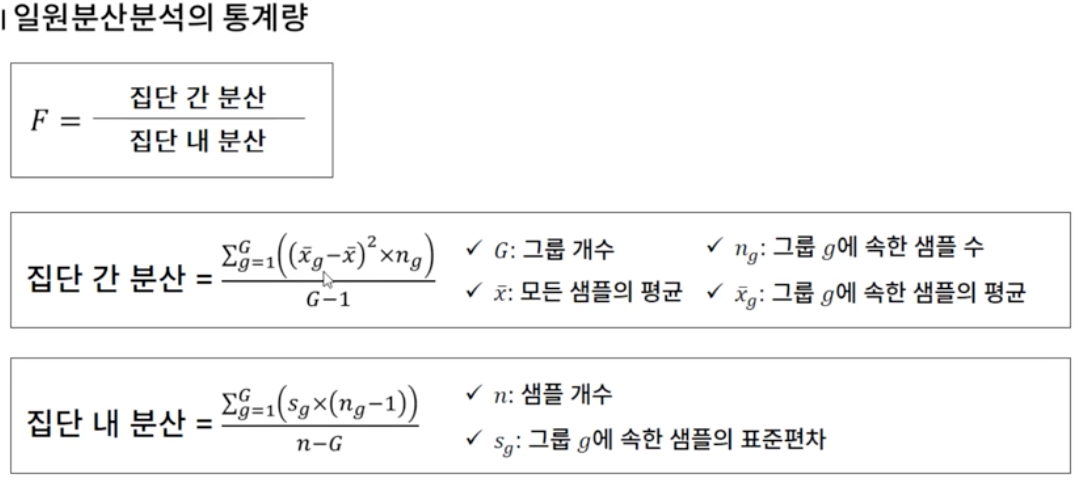

- 집단 간 분산: 자유도는 그룹의 개수-1. 특정 그룹에 속한 평균과 전체 평균과의 차이가 크면 클 수록 커진다.  
- 집단 내 분산: 각 그룹에 대한 표준 편차와 샘플 갯수가 반영된다. 즉, 각 집단 내 분산의 합계로 특정 집단과 전체와의 차이를 반영한다.
 

## 사후분석: Tukey HSD test
Tukey HSD test(honestly significant difference test)는 일원분산분석에서 두 그룹 a와 b간의 차이가 유의한 지 파악하는 대표적인 사후 분석 방법이다.  

$$ HSD_{a,b} = \frac {\max{(\mu_a, \mu_b)} - {\min{(\mu_a, \mu_b)}}} {SE} $$
각 평균 중 큰 값에서 작은 값을 뺀 것이 분자이며, $SE$는 그룹간의 표준오차.  

- 필요한 이유: 대립가설을 보면 '최소한 한개는 차이를 보인다'는 것이다. 만약 차이를 보인다는 결과가 나왔다면, **구체적으로 어떤 그룹에 의해 영 가설이 기각되는지**, 차이를 보이는지 알아야 할 것이다.  
- 만약 p-value가 특정 수치 이상으로, 영 가설을 기각하지 못했다면 사후 분석을 굳이 할 필요가 없을 것이다.  
- 튜키테스트를 포함한 모든 테스트는, 사후 분석을 한 결과로, '어떤 그룹에 차이가 있고, 어떤 그룹에 차이가 없다' 라는 형태로 의사결정을 할 수 있다.  

사후 분석을 하기 위해서도 만족해야할 가정이 필요하다. 정규성, 독립성, 등분산성.

## 파이썬을 이용한 일원분산분석
- 정규성 검정 (KS test)  
```
scipy.stats.kstest(x, 'norm')
```
    p-value가 특정 수치 미만이면 정규성을 따른다고 판단
- 일원분산분석  
```
scipy.stats.f_oneway(sample1, sample2, sample3, ...)
```
    p-value가 특정 수치 미만이면 최소 하나의 그룹은 다른 그룹의 평균과 다르다고 판단(즉, 특정 실험의 효과가 존재)
- 사후분석  
```
statsmodels.stats.multicomp.pairwise_tukeyhsd(Data, Group) 
```
    각 그룹 간 reject 결과 확인. Reject컬럼이 True면 **그룹 간 차이가 유의하다고 할 수 있음**

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import *

import os
os.chdir(r"/Users/Angela/Desktop/과속대학쿠쿠루/2. 탐색적 데이터 분석/데이터")

In [3]:
# 데이터 불러오기 및 확인
df = pd.read_csv("지점별_일별판매량.csv", encoding = "cp949")
df.head()

,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222
